In [1]:
from collections import namedtuple
import sys

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def readgrid(filename):
    out = []
    with open(filename, "r") as fh:
        for l in fh:
            out.append([c for c in l.strip()])
    return np.array(out)

In [3]:
test = readgrid("test.txt")

In [4]:
def f(c):
    if c == 'S' or c == 'E':
        return 30
    else:
        return ord(c) - ord('a')
    
vf = np.vectorize(f)

In [5]:
print(test)

[['S' 'a' 'b' 'q' 'p' 'o' 'n' 'm']
 ['a' 'b' 'c' 'r' 'y' 'x' 'x' 'l']
 ['a' 'c' 'c' 's' 'z' 'E' 'x' 'k']
 ['a' 'c' 'c' 't' 'u' 'v' 'w' 'j']
 ['a' 'b' 'd' 'e' 'f' 'g' 'h' 'i']]


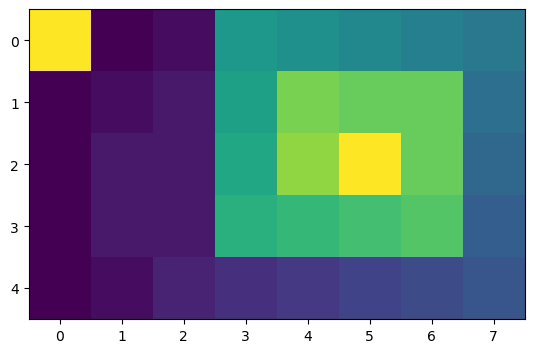

In [6]:
plt.imshow(vf(test))

In [7]:
inp = readgrid("input.txt")

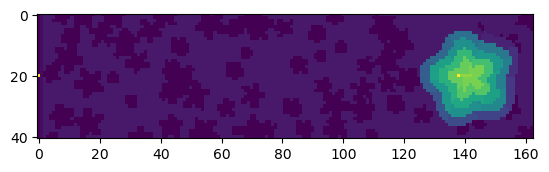

In [8]:
plt.imshow(vf(inp))

In [9]:
Point = namedtuple("Point", "x y")

In [10]:
np.where(inp == 'S')

(array([20], dtype=int64), array([0], dtype=int64))

In [11]:
def findchar(grid, c):
    out = np.where(grid == c)
    y = out[0][0]
    x = out[1][0]
    return Point(x, y)

findchar(inp, 'S')

Point(x=0, y=20)

In [12]:
findchar(inp, 'E')

Point(x=138, y=20)

In [13]:
def getraw(p, grid):
    return grid[p.y,p.x]

def get(p, grid):
    h, w = grid.shape
    if p.x >= 0 and p.x < w and p.y >= 0 and p.y < h:
        pvalue = getraw(p, grid)
        if pvalue == 'S':
            return 'a'
        elif pvalue == 'E':
            return 'z'
        else:
            return pvalue
    else:
        return None

In [14]:
def neighbors(p, grid, reverse=False):
    out = []
    pvalue = get(p, grid)
    #print(pvalue)
    for pn in [Point(p.x,p.y-1), Point(p.x+1,p.y), Point(p.x,p.y+1), Point(p.x-1,p.y)]:
        a, b = pvalue, get(pn, grid)
        if reverse:
            a, b = b, a
        if a is not None and b is not None and ord(b)-ord(a) <= 1:
            out.append(pn)
    return out

neighbors(findchar(inp, 'S'), inp)

[Point(x=0, y=19), Point(x=1, y=20), Point(x=0, y=21)]

In [15]:
Step = namedtuple("Step", "point nsteps")

def bfs(grid, startc, endc, debug=False, reverse=False):
    start = findchar(grid, startc)
    visited = set()
    visited.add(start)
    queue = []
    queue.append(Step(start, 0))

    while queue:
        s = queue.pop(0)
        if debug:
            print(s, get(s.point, grid))
        if getraw(s.point, grid) == endc:
            return(s.nsteps)

        for n in neighbors(s.point, grid, reverse=reverse):
            if n not in visited:
                visited.add(n)
                queue.append(Step(n, s.nsteps+1))

def run1(grid, debug=False):
    return bfs(grid, 'S', 'E', debug=debug)
                
run1(test, debug=True)

Step(point=Point(x=0, y=0), nsteps=0) a
Step(point=Point(x=1, y=0), nsteps=1) a
Step(point=Point(x=0, y=1), nsteps=1) a
Step(point=Point(x=2, y=0), nsteps=2) b
Step(point=Point(x=1, y=1), nsteps=2) b
Step(point=Point(x=0, y=2), nsteps=2) a
Step(point=Point(x=2, y=1), nsteps=3) c
Step(point=Point(x=1, y=2), nsteps=3) c
Step(point=Point(x=0, y=3), nsteps=3) a
Step(point=Point(x=2, y=2), nsteps=4) c
Step(point=Point(x=1, y=3), nsteps=4) c
Step(point=Point(x=0, y=4), nsteps=4) a
Step(point=Point(x=2, y=3), nsteps=5) c
Step(point=Point(x=1, y=4), nsteps=5) b
Step(point=Point(x=2, y=4), nsteps=6) d
Step(point=Point(x=3, y=4), nsteps=7) e
Step(point=Point(x=4, y=4), nsteps=8) f
Step(point=Point(x=5, y=4), nsteps=9) g
Step(point=Point(x=6, y=4), nsteps=10) h
Step(point=Point(x=7, y=4), nsteps=11) i
Step(point=Point(x=7, y=3), nsteps=12) j
Step(point=Point(x=7, y=2), nsteps=13) k
Step(point=Point(x=7, y=1), nsteps=14) l
Step(point=Point(x=7, y=0), nsteps=15) m
Step(point=Point(x=6, y=0), nsteps

31

In [16]:
run1(inp)

534

In [18]:
def run2(grid, debug=False):
    return bfs(grid, 'E', 'a', debug=debug, reverse=True)

run2(test)

29

In [19]:
run2(inp)

525